Importing relevant libraries

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tiff 
import os
import numpy as np
import random as rn
import time

Unziping the Scanned Document dataset

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/data/nouvel_obs_2402_scanned-1.0.zip' -d '/content'

Archive:  /content/drive/MyDrive/Colab Notebooks/data/nouvel_obs_2402_scanned-1.0.zip
  inflating: /content/input/100_nouvel-obs_hbhnr300_constructedPdf_Nouvelobs2402PDF.scanned.png  
  inflating: /content/input/101_nouvel-obs_hbhnr300_constructedPdf_Nouvelobs2402PDF.scanned.png  
  inflating: /content/input/102_nouvel-obs_hbhnr300_constructedPdf_Nouvelobs2402PDF.scanned.png  
  inflating: /content/input/103_nouvel-obs_hbhnr300_constructedPdf_Nouvelobs2402PDF.scanned.png  
  inflating: /content/input/104_nouvel-obs_hbhnr300_constructedPdf_Nouvelobs2402PDF.scanned.png  
  inflating: /content/input/106_nouvel-obs_hbhnr300_constructedPdf_Nouvelobs2402PDF.scanned.png  
  inflating: /content/input/107_nouvel-obs_hbhnr300_constructedPdf_Nouvelobs2402PDF.scanned.png  
  inflating: /content/input/110_nouvel-obs_hbhnr300_constructedPdf_Nouvelobs2402PDF.scanned.png  
  inflating: /content/input/112_nouvel-obs_hbhnr300_constructedPdf_Nouvelobs2402PDF.scanned.png  
  inflating: /content/input/114_

Testing the detector algorithm on a sample mage

In [ ]:
img = cv2.imread('/content/input/100_nouvel-obs_hbhnr300_constructedPdf_Nouvelobs2402PDF.scanned.png')

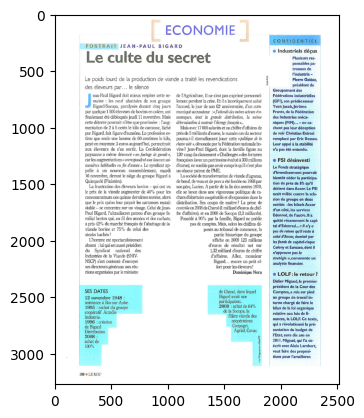

In [ ]:
plt.imshow(img)

In [ ]:
def Convert_Binary(img): # Function to convert an RGB image into Binary image then return the result
    # Convert the RGB image to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # Apply thresholding to create binary image
    thresh_img = cv2.threshold(gray_img, 128, 255, cv2.THRESH_BINARY)[1]
    return thresh_img

In [ ]:
def Erosion(img, kernel, anc = (-1,-1), prt = True): # Function to apply Erosion on an Binary image then return the result
    m,n = img.shape
    # Define a structuring element for analysis
    # if kernel:
    #   kernel = np.ones((k_size, k_size), np.uint8)
    # constant= (k_size-1)//2
    #Define new image
    # imgErode= np.zeros((m,n), dtype=np.uint8)
    # #Erosion without using inbuilt cv2 function for morphology
    # for i in range(constant, m-constant):
    #   for j in range(constant,n-constant):
    #     temp = img[i-constant:i+constant+1, j-constant:j+constant+1]
    #     product = temp*kernel
    #     imgErode[i,j] = np.min(product)
    # print(kernel)
    imgErode = cv2.erode(img, kernel, anchor=anc, iterations=1)
    if prt: 
      plt.imshow(imgErode,cmap="gray")
    return imgErode

In [ ]:
def Dilation(img, kernel, anc = (-1,-1), prt = True): # Function to apply Dilation on an Binary image then return the result
    #Acquire size of the image
    # p,q = img.shape
    #Define new image to store the pixels of dilated image
    # imgDilate= np.zeros((p,q), dtype=np.uint8)
    #Define the structuring element 
    # if kernel == None:
    #   kernel = np.ones((k_size, k_size), np.uint8)
    # constant1 = (k_size-1)//2
    # #Dilation operation without using inbuilt CV2 function
    # for i in range(constant1, p-constant1):
    #   for j in range(constant1,q-constant1):
    #     temp= img[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
    #     product= temp*kernel
    #     imgDilate[i,j]= np.max(product)
    # print(kernel)
    imgDilate = cv2.dilate(img, kernel, anchor=anc, iterations=1)
    if prt:
      plt.imshow(imgDilate,cmap="gray")
    return imgDilate

In [ ]:
def Opening(img, kernel, anc = (-1,-1), prt = True): # Function to apply Opening on an Binary image then return the result
  er = Erosion(img, kernel, anc, prt)
  dil = Dilation(er, kernel, anc, prt)
  return dil

def Closing(img, kernel, anc = (-1,-1), prt = True): # Function to apply Closing on an Binary image then return the result
  dil = Dilation(img, kernel, anc, prt)
  er = Erosion(dil, kernel, anc, prt)
  return er

In [ ]:
def similarity(a, b): # Function to check the similarity between two images
    # Compute the difference between the opening and closing operations
    diff = cv2.absdiff(a, b)

    # Compute the sum of pixel intensities in the difference image
    sum_diff = cv2.sumElems(diff)[0]

    # Compute the sum of pixel intensities in the binary image
    sum_binary = cv2.sumElems(a)[0]

    # Compute the ratio of difference to binary image intensities
    ratio = sum_diff / sum_binary
    return ratio

## Structural Elements

Manually creating Structural elements and it's anchor point

In [ ]:
b1 = [[0,0,0],
      [1,1,1],
      [0,0,0]]
b2 = [[0,1,0],
      [0,1,0],
      [0,1,0]]
b3 = [[1,0,0],
      [0,1,0],
      [0,0,1]]
b4 = [[0,0,1],
      [0,1,0],
      [1,0,0]]
b5 = [[0,1,0],
      [1,1,1],
      [0,1,0]]
b6 = [[1,0,1],
      [0,1,0],
      [1,0,1]]
b7 = [[1,0,0],
      [1,0,0],
      [1,1,1]]
b8 = ([[0,0,1],
      [0,0,1],
      [1,1,1]])
b9 = [[1,1,1],
      [0,0,1],
      [0,0,1]]
b10 = [[1,1,1],
       [1,0,0],
       [1,0,0]]
b11 = [[1,1,1],
       [0,1,1],
       [0,0,1]]
b12 = [[1,1,1],
       [1,1,0],
       [1,0,0]]
b13 = [[0,0,1],
       [0,1,1],
       [1,1,1]]
b14 = [[1,0,0],
       [1,1,0],
       [1,1,1]]
b15 = [[1,1,1],
       [1,1,1],
       [1,1,1]]
b16 = [[0,0,0,0,0],
       [0,0,0,0,0],
       [1,1,1,1,1],
       [0,0,0,0,0],
       [0,0,0,0,0]]
b17 = [[0,0,1,0,0],
       [0,0,1,0,0],
       [0,0,1,0,0],
       [0,0,1,0,0],
       [0,0,1,0,0]]
b18 = [[1,0,0,0,0],
       [0,1,0,0,0],
       [0,0,1,0,0],
       [0,0,0,1,0],
       [0,0,0,0,1]]
b19 = [[0,0,0,0,1],
       [0,0,0,1,0],
       [0,0,1,0,0],
       [0,1,0,0,0],
       [1,0,0,0,0]]
b20 = [[0,0,1,0,0],
       [0,0,1,0,0],
       [1,1,1,1,1],
       [0,0,1,0,0],
       [0,0,1,0,0]]
b21 = [[1,0,0,0,1],
       [0,1,0,1,0],
       [0,0,1,0,0],
       [0,1,0,1,0],
       [1,0,0,0,1]]
b22 = [[1,0,0,0,0],
       [1,0,0,0,0],
       [1,0,0,0,0],
       [1,0,0,0,0],
       [1,1,1,1,1]]
b23 = [[0,0,0,0,1],
       [0,0,0,0,1],
       [0,0,0,0,1],
       [0,0,0,0,1],
       [1,1,1,1,1]]
b24 = [[1,1,1,1,1],
       [1,0,0,0,0],
       [1,0,0,0,0],
       [1,0,0,0,0],
       [1,0,0,0,0]]
b25 = [[1,1,1,1,1],
       [0,0,0,0,1],
       [0,0,0,0,1],
       [0,0,0,0,1],
       [0,0,0,0,1]]
b26 = [[0,0,1,0,0],
       [0,1,1,1,0],
       [1,1,1,1,1],
       [0,1,1,1,0],
       [0,0,1,0,0]]
b27 = [[0,0,0,0,0],
       [1,1,1,1,1],
       [1,1,1,1,1],
       [1,1,1,1,1],
       [0,0,0,0,0]]
b28 = [[0,1,1,1,0],
       [0,1,1,1,0],
       [0,1,1,1,0],
       [0,1,1,1,0],
       [0,1,1,1,0]]
b29 = [[1,1,0,0,0],
       [1,1,1,0,0],
       [0,1,1,1,0],
       [0,0,1,1,1],
       [0,0,0,1,1]]
b30 = [[0,0,0,1,1],
       [0,0,1,1,1],
       [0,1,1,1,0],
       [1,1,1,0,0],
       [1,1,0,0,0]]
b31 = [[1,0,0,0,0],
       [1,1,0,0,0],
       [1,1,1,0,0],
       [1,1,1,1,0],
       [1,1,1,1,1]]
b32 = [[1,1,1,1,1],
       [0,1,1,1,1],
       [0,0,1,1,1],
       [0,0,0,1,1],
       [0,0,0,0,1]]
b33 = [[1,1,1,1,1],
       [1,1,1,1,0],
       [1,1,1,0,0],
       [1,1,0,0,0],
       [1,0,0,0,0]]
b34 = [[1,1,1,1,1],
       [0,1,1,1,1],
       [0,0,1,1,1],
       [0,0,0,1,1],
       [0,0,0,0,1]]
b35 = [[0,1,1,1,0],
       [1,1,1,1,1],
       [1,1,1,1,1],
       [1,1,1,1,1],
       [0,1,1,1,0]]
b36 = [[1,1,1,1,1],
       [1,1,1,1,1],
       [1,1,1,1,1],
       [1,1,1,1,1],
       [1,1,1,1,1]]

In [ ]:
a1 = a2 = a3 = a4 = (1,1)
a5 = a6 = (1,1)
a7 = (0,2)
a8 = (2,2)
a9 = (2,0)
a10 = (0,0)
a11 = (2,0)
a12 = (0,0)
a13 = (2,2)
a14 = (0,2)
a15 = (1, 1)
a16 = a17 = a18 = a19 = a20 = a21 = (2, 2)
a22 = (0, 4)
a23 = (4, 4)
a24 = (4, 0)
a25 = (0, 0)
a26 = a27 = a28 = a29 = a30 = (2, 2)
a31 = (0, 4)
a32 = (4, 4)
a33 = (4, 0)
a34 = (0, 0)
a35 = a36 = (2, 2)

Storing the the structural elements and it's anchor point

In [ ]:
custom_kernels = [b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,b13,b14,b15,b16,b17,b18,b19,b20,b21,b22,b23,b24,b25,b26,b27,b28,b29,b30,b31,b32,b33,b34,b35,b36]
custom_anchors = [a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a20,a21,a22,a23,a24,a25,a26,a27,a28,a29,a30,a31,a32,a33,a34,a35,a36]

In [ ]:
filters = ["No-filter", "Erosion", "Dilation"]

In [ ]:
kernel = np.ones((5,5), np.uint8)

Verifying the detection algorithm on an binary image

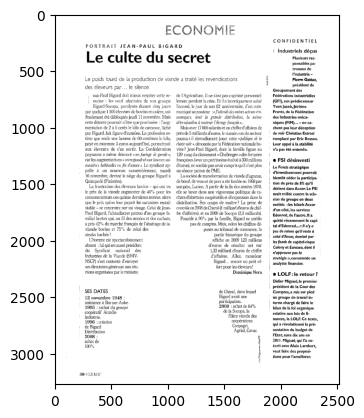

In [ ]:
bin_img = Convert_Binary(img)
plt.imshow(bin_img, cmap="gray")

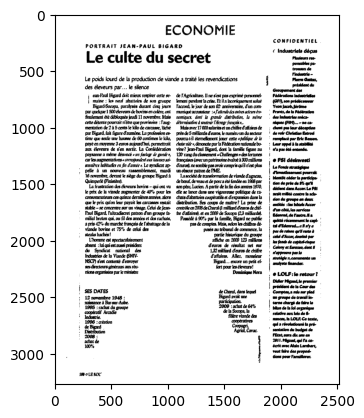

In [ ]:
# Firstly we will convert this into erroded image then we will use this eroded image to detect the erosion using the closing filter as an detection algorithm to the test image
err_img = Erosion(bin_img, np.array(custom_kernels[18], np.uint8), anc = custom_anchors[18], prt = True)

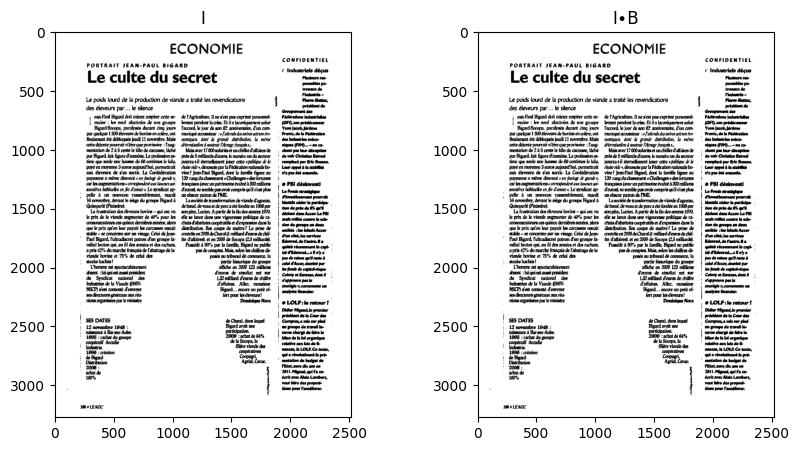

In [ ]:
# Applying the closing operation on the eroded image
clo_img = Closing(err_img, np.array(custom_kernels[18], np.uint8), anc = custom_anchors[18], prt = False)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Show the first image on the left subplot
ax1.imshow(err_img,cmap="gray")
ax1.set_title('I')

# Show the second image on the right subplot
ax2.imshow(clo_img,cmap="gray")
ax2.set_title('I∙B')

# Display the figure
plt.show()

In [ ]:
# measuring the similarity between them 
similarity(err_img, clo_img)

0.0

Here, we can see that both the plotted images looks alike as well as the similarity between them is also zero (i.e both the images are same)

In [ ]:
path = '/content/input/'
choices = os.listdir(path)
no_of_images = 125

# Obtainig 125 random images from the pool of images
images_file = np.random.choice(choices, no_of_images)

## Verifying whether there is any morphological filter already applied in it

labels are as follows:
* Non-filter - 1
* Erosion - 2
* Dilation - 3

In [ ]:
pred = [] # it will store all the predicted labels 
for img_names in images_file: # iterting through all the randomly selected 125 images
  img = cv2.imread(path+img_names)
  bin_img = Convert_Binary(img) # converting into binary images
  morpho = None
  for k, kernel in enumerate(custom_kernels): # Applying brute fore method using all the structural elements
    anchor = custom_anchors[k] 
    clo_img = Closing(bin_img, np.array(kernel, np.uint8), anc = anchor, prt=False)
    ope_img = Opening(bin_img, np.array(kernel, np.uint8), anc = anchor, prt = False)
    # Cheking whether the image was gone throgh erosion or dilation
    sim1 = similarity(clo_img, bin_img)
    sim2 = similarity(ope_img, bin_img)
    
    if min(sim1, sim2) == 0:
      # storing the label in variable morpho
      if sim1 == 0: morpho = 2
      elif sim2 == 0: morpho = 3 
    else:
      morpho = 1
  pred.append(morpho)

In [ ]:
pred

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [ ]:
count_dict = {}
for elem in pred:
    count_dict[elem] = pred.count(elem)

# Count of each labels
print(count_dict)

{1: 125}


Here we can see that the Dataset is was not gone through any morphological filter. So now, we will be creating our own labeled datatset. Where we will rendomly choose any of the filter with randomly selected structural element.

## Using 36 Structural Elements

In [ ]:
# x = np.array(b14, np.uint8)

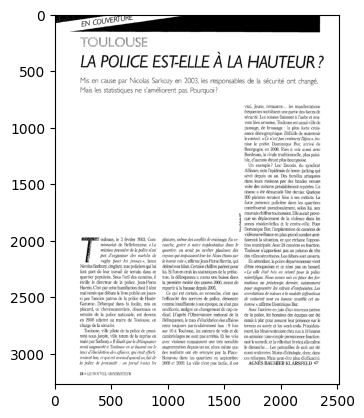

In [ ]:
plt.imshow(bin_img, cmap='gray')
plt.show()

In [ ]:
for i in range(len(custom_kernels)):
    err = Erosion(bin_img, np.array(custom_kernels[i], np.uint8), anc = custom_anchors[i], prt=False)
    dil = Dilation(bin_img, np.array(custom_kernels[i], np.uint8), anc = custom_anchors[i], prt=False)
    clo = Closing(err, np.array(custom_kernels[i], np.uint8), anc = custom_anchors[i], prt=False)
    ope = Opening(dil, np.array(custom_kernels[i], np.uint8), anc = custom_anchors[i], prt=False)
    
    kerr = Erosion(np.array(custom_kernels[i], np.uint8), np.array(custom_kernels[i], np.uint8), anc = custom_anchors[i], prt=False)
    kdil = Dilation(kerr, np.array(custom_kernels[i], np.uint8), anc = custom_anchors[i], prt=False)
    print('b'+str(i+1),similarity(err, clo), similarity(dil, ope), end = " :--")
    print(similarity(kerr, kdil))

b1 0.0 0.0 :--0.0
b2 0.0 0.0 :--0.0
b3 0.0 0.0 :--0.0
b4 0.0 0.0 :--0.0
b5 0.0 0.0 :--4.0
b6 0.0 0.0 :--0.0
b7 0.08712710667396611 0.0298166801651098 :--0.0
b8 0.08749450683997222 0.029514837747370286 :--0.0
b9 0.08643703527761494 0.029640568235075535 :--0.0
b10 0.08747658740815722 0.027800002337699737 :--0.0
b11 0.08741154304349426 0.030135170774364593 :--0.0
b12 0.08839247936071148 0.028303651690190234 :--0.0
b13 0.08848502525597918 0.030208986128365402 :--0.0
b14 0.08802656318067827 0.030300965199954483 :--0.0
b15 0.0 0.0 :--0.0
b16 0.0 0.0 :--0.0
b17 0.0 0.0 :--0.0
b18 0.0 0.0 :--0.0
b19 0.0 0.0 :--0.0
b20 0.0 0.0 :--8.0
b21 0.0 0.0 :--0.8
b22 0.1364020274122037 0.008686806070854479 :--0.0
b23 0.13367632734899812 0.008756222380564269 :--0.0
b24 0.14454160476068376 0.008779064836327587 :--1.7777777777777777
b25 0.14430594976501188 0.009895509398793087 :--1.7777777777777777
b26 0.0 0.0 :--12.0
b27 0.0 0.0 :--2.0
b28 0.0 0.0 :--2.0
b29 0.0 0.0 :--1.6
b30 0.0 0.0 :--1.6
b31 0.139271530

Here we can have the observation that the asymetric structural elements result
* I’⊖B ≠ I•B  
* I’⊕B ≠ I∘B


and for symetric structural elements
* I’⊖B = I•B 
* I’⊕B = I∘B

## Creating Labeled Dataset


We don't have labeled dataset so we will be creating of our own

In [ ]:
no_of_images = 125
images_file = np.random.choice(choices, no_of_images)
mod_images = []
labels = [] # To store the labels
kernels_index = [] # To store the structural elements

for img_names in images_file: # iterating through all the 125 selected 
  img = cv2.imread(path+img_names) # read the image from the directory
  bin_img = Convert_Binary(img) # Converting it into binary image
  val = rn.randint(2,3) # randomly select which filter to apply
  k = rn.randint(0,len(custom_anchors)-1) 
  kernel = custom_kernels[k] 
  anchor = custom_anchors[k]
  if val == 1:
    mod_images.append(bin_img)
  elif val == 2: 
    mod_images.append(Erosion(bin_img, np.array(kernel, np.uint8), anc = anchor, prt=False))
  elif val == 3:
    mod_images.append(Dilation(bin_img, np.array(kernel, np.uint8), anc = anchor, prt=False))
  labels.append(val) # save the label in the array
  kernels_index.append(k) # save the structural element index from the custom_kernels varaible

In [ ]:
len(mod_images), len(labels)

(125, 125)

In [ ]:
test_image_index = 106

(<matplotlib.image.AxesImage at 0x7f8d0d4281c0>, 3, 31)

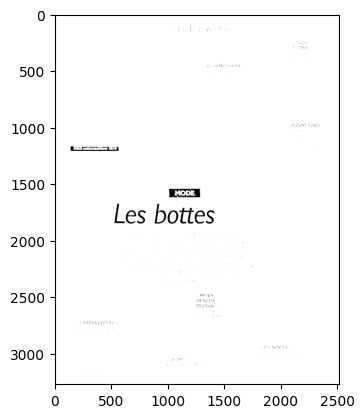

In [ ]:
plt.imshow(mod_images[test_image_index], cmap="gray"), labels[test_image_index], kernels_index[test_image_index]

## Prediction

Using brute force method to find morphological filter and structural element

In [ ]:
start_time = time.time() # to obtain the execution time of this code with brute force methodlabels
pred_kernels = [] # to save the structural elements predicted
pred = [] # to save the labels predicted
for mod_img in mod_images:
  best = float('inf')
  morpho = None
  ker = None
  for k, kernel in enumerate(custom_kernels): # Using brute fore method by iterating through all the 36 structural elements
    # kernel = custom_kernels[k]
    anchor = custom_anchors[k]
    clo_img = Closing(mod_img, np.array(kernel, np.uint8), anc = anchor, prt=False)
    ope_img = Opening(mod_img, np.array(kernel, np.uint8), anc = anchor, prt = False)
    sim1 = similarity(clo_img, mod_img)
    sim2 = similarity(ope_img, mod_img)
    
    if best >= min(sim1, sim2): # obtaining the minimum similarity and append the label into the labels variable
      best = min(sim1, sim2)
      ker = kernel
      if sim1 == min(sim1, sim2): morpho = 2
      elif sim2 == min(sim1, sim2): morpho = 3 
      elif best > 0.2: morpho = 1
    print(len(pred), k, best, min(sim1, sim2))
  # print(len(pred)) 
  pred.append(morpho)
  pred_kernels.append(custom_kernels.index(ker))

end_time = time.time()
total_time = end_time - start_time
print(f"Total time taken: {total_time} seconds") # showing the time taken

0 0 0.0 0.0
0 1 0.0 0.0004302226338862327
0 2 0.0 0.0010870253364903707
0 3 0.0 0.001058379123835802
0 4 0.0 0.0009106109917443676
0 5 0.0 0.0010701531506660661
0 6 0.0 0.014914938390067608
0 7 0.0 0.014948950918893568
0 8 0.0 0.01488608120769485
0 9 0.0 0.014973303114306035
0 10 0.0 0.015031052526180333
0 11 0.0 0.015112499685688008
0 12 0.0 0.015098445793564865
0 13 0.0 0.015055457198884854
0 14 0.0 0.0010075485272847402
0 15 0.0 0.0
0 16 0.0 0.0014071885677011593
0 17 0.0 0.003159470468638503
0 18 0.0 0.003114414612614629
0 19 0.0 0.002639156504732626
0 20 0.0 0.0038077214088569214
0 21 0.0 0.024261613130976706
0 22 0.0 0.024411775917312716
0 23 0.0 0.026769033620620202
0 24 0.0 0.026942248679617545
0 25 0.0 0.00271049281076405
0 26 0.0 0.001074191889181604
0 27 0.0 0.00216993786161934
0 28 0.0 0.0029680746447241163
0 29 0.0 0.002933977204053808
0 30 0.0 0.025126617153627122
0 31 0.0 0.027142297938968975
0 32 0.0 0.027502562220652057
0 33 0.0 0.027730968716962658
0 34 0.0 0.00271927

Creating a dictionary which stores which else structural elements can generated by dilation with any other structural element

In [ ]:
sample = {'b1': [14, 15, 26, 27, 34, 35],
 'b2': [14, 16, 26, 27, 34, 35],
 'b3': [17, 28],
 'b4': [18, 29],
 'b5': [25, 34],
 'b6': [35],
 'b7': [30],
 'b8': [31],
 'b9': [33],
 'b10': [32],
 'b11': [33],
 'b12': [32],
 'b13': [31],
 'b14': [30],
 'b15': [26, 27, 34, 35],
 'b16': [26, 35],
 'b17': [27, 35],
 'b18': [],
 'b19': [],
 'b20': [],
 'b21': [],
 'b22': [],
 'b23': [],
 'b24': [],
 'b25': [],
 'b26': [],
 'b27': [35],
 'b28': [35],
 'b29': [],
 'b30': [],
 'b31': [],
 'b32': [],
 'b33': [],
 'b34': [],
 'b35': [],
 'b36': []}

In [ ]:
start_time = time.time() # to obtain the execution time of this code with brute force methodlabels
pred = [] # to store the labels
pred_kernels = [] # to store the structural elements
for mod_img in mod_images: # iterating through all the 125 randomly selected images
  best = float('inf')
  morpho = None
  ker = None
  skip = [] # creating a skip list to store the index of the structural elements to skip
  for k, kernel in enumerate(custom_kernels):
    # kernel = custom_kernels[k]
    if k in skip: # Applying the theorem 2 (Optimizing the code)
      continue
    anchor = custom_anchors[k]
    clo_img = Closing(mod_img, np.array(kernel, np.uint8), anc = anchor, prt=False)
    ope_img = Opening(mod_img, np.array(kernel, np.uint8), anc = anchor, prt = False)
    sim1 = similarity(clo_img, mod_img)
    sim2 = similarity(ope_img, mod_img)
    
    if best >= min(sim1, sim2): # obtaining the minimum similarity and append the label into the labels variable
      best = min(sim1, sim2)
      ker = kernel
      if sim1 == min(sim1, sim2): morpho = 2
      elif sim2 == min(sim1, sim2): morpho = 3 
      elif best > 0.2: morpho = 1
    elif best < min(sim1, sim2): # if the minimum among them is greater than the minimum similarity till that iteration, them we will add bi list into skip
      skip.extend(sample["b"+str(k+1)])
    print(len(pred), k, best, min(sim1, sim2))
  # print(len(pred)) 
  pred.append(morpho)
  pred_kernels.append(custom_kernels.index(ker))
end_time = time.time()
total_time = end_time - start_time
print(f"Total time taken: {total_time} seconds") # showing the time complexity

0 0 0.0 0.0
0 1 0.0 0.0004302226338862327
0 2 0.0 0.0010870253364903707
0 3 0.0 0.001058379123835802
0 4 0.0 0.0009106109917443676
0 5 0.0 0.0010701531506660661
0 6 0.0 0.014914938390067608
0 7 0.0 0.014948950918893568
0 8 0.0 0.01488608120769485
0 9 0.0 0.014973303114306035
0 10 0.0 0.015031052526180333
0 11 0.0 0.015112499685688008
0 12 0.0 0.015098445793564865
0 13 0.0 0.015055457198884854
0 15 0.0 0.0
0 19 0.0 0.002639156504732626
0 20 0.0 0.0038077214088569214
0 21 0.0 0.024261613130976706
0 22 0.0 0.024411775917312716
0 23 0.0 0.026769033620620202
0 24 0.0 0.026942248679617545
1 0 0.00047939199708701535 0.00047939199708701535
1 1 0.00047939199708701535 0.0008304156814199447
1 2 0.00047939199708701535 0.0030838222473373515
1 3 0.00047939199708701535 0.001592433793492041
1 4 0.00047939199708701535 0.0016888402022646799
1 5 0.00047939199708701535 0.002026253290461539
1 6 0.00047939199708701535 0.04738332501115614
1 7 0.00047939199708701535 0.0488597428332623
1 8 0.000479391997087015

Time complexity with and without opetimised code

Method  | Time Takes in sec 
-------------------|------------------
without using Theorem 2       | 95.89385795593262
using Theorem 2               | 51.211506366729736

In [ ]:
len(pred)

125

In [ ]:
pred == labels

True

In [ ]:
kernels_index == pred_kernels

False

We can see that our predicted labels and the actual labels are same but there is some inaccuarcy in predicting the structural elements

In [ ]:
import pandas as pd

# create a dictionary to store the results
results = {"Label": [], "Total": [], "Correct": [], "Accuracy %": []}

# iterate over each label
for label in set(labels):
    # count the total number of times the label appears in the original labels array
    total = labels.count(label)
    # count the number of times the predicted label matches the original label
    correct = sum(1 for i in range(len(pred)) if pred[i] == label and labels[i] == label)
    # calculate the accuracy as a percentage
    accuracy = round(correct / total * 100, 2)
    # add the results to the dictionary
    results["Label"].append(filters[label-1])
    results["Total"].append(total)
    results["Correct"].append(correct)
    results["Accuracy %"].append(accuracy)

# create a pandas DataFrame from the dictionary
df = pd.DataFrame(results)

# set the Label column as the index
df.set_index("Label", inplace=True)

# display the results
df

,Total,Correct,Accuracy %
Label,,,
Erosion,57,57,100.0
Dilation,68,68,100.0


In [ ]:
extra = pd.DataFrame(columns = ["Actual", "Predicted"])
extra['Actual'] = kernels_index
extra['Predicted'] = pred_kernels
pd.options.display.max_rows=125

Here I have created a table where you can correspondingly check the actual and predicted structural elements index from that "custom_kernels" variable

In [ ]:
extra

,Actual,Predicted
0,15,15
1,9,0
2,23,0
3,18,18
4,0,0
5,18,18
6,13,0
7,33,0
8,27,27
9,0,0


In [ ]:
Kernels_names = ['b1','b2','b3','b4','b5','b6','b7','b8','b9','b10','b11','b12','b13','b14','b15','b16','b17','b18','b19','b20','b21','b22','b23','b24','b25','b26','b27','b28','b29','b30','b31','b32','b33','b34','b35','b36']

In [ ]:
cnt = 1
for i in range(125):
  if pred_kernels[i] == kernels_index[i]:
    cnt += 1
print("Percentage of detcting structural elements {}%".format(round(cnt/125,1)*100))

Percentage of detcting structural elements 60.0%


In [ ]:
import pandas as pd

# create a dictionary to store the results
results = {"Kernels Names": [], "Total": [], "Correct": [], "Accuracy %": []}

# iterate over each label
for label in set(kernels_index):
    # count the total number of times the label appears in the original labels array
    total = kernels_index.count(label)
    # count the number of times the predicted label matches the original label
    correct = sum(1 for i in range(len(pred_kernels)) if pred_kernels[i] == label and kernels_index[i] == label)
    # calculate the accuracy as a percentage
    accuracy = round(correct / total * 100, 2)
    # add the results to the dictionary
    results["Kernels Names"].append(Kernels_names[label-1])
    results["Total"].append(total)
    results["Correct"].append(correct)
    results["Accuracy %"].append(accuracy)

# create a pandas DataFrame from the dictionary
df = pd.DataFrame(results)

# set the Label column as the index
df.set_index("Kernels Names", inplace=True)

# display the results
df

,Total,Correct,Accuracy %
Kernels Names,,,
b36,5,5,100.0
b1,3,3,100.0
b2,4,4,100.0
b3,5,5,100.0
b4,2,2,100.0
b5,3,3,100.0
b6,2,0,0.0
b7,3,0,0.0
b8,5,0,0.0
